In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, norm

In [4]:
diabetes = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
diabetes.shape

(253680, 22)

In [7]:
diabetes.columns.tolist()

['Diabetes_012',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [8]:
diabetes["Diabetes_012"].describe()

count    253680.000000
mean          0.296921
std           0.698160
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Diabetes_012, dtype: float64

In [9]:
diabetes["Diabetes_012"].unique()

array([0., 2., 1.])

In [12]:
diabetes["Diabetes_012"].isnull().sum()

np.int64(0)

In [13]:
diabetes["Diabetes_012"].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    2.0
9    0.0
Name: Diabetes_012, dtype: float64

In [16]:
diabetes["Diabetes_012"].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [18]:
diabetes["Diabetes_012"].dtype

dtype('float64')

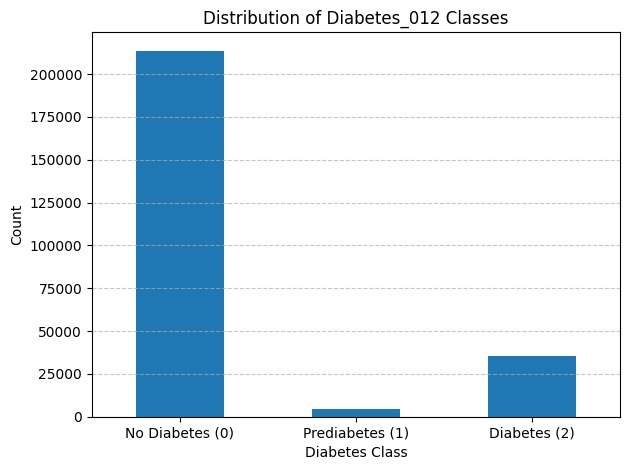

In [21]:
counts = diabetes["Diabetes_012"].value_counts().reindex([0, 1, 2], fill_value=0)

counts.plot(kind='bar')
plt.xlabel("Diabetes Class")
plt.ylabel("Count")
plt.title("Distribution of Diabetes_012 Classes")
plt.xticks(ticks=[0, 1, 2], labels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [23]:
skew(diabetes["Diabetes_012"])

np.float64(1.9763787297494344)

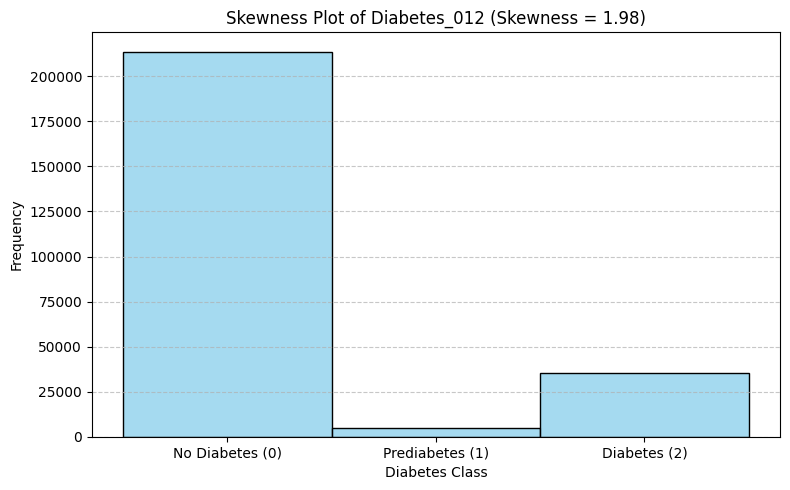

In [27]:
skew_val = skew(diabetes["Diabetes_012"])

plt.figure(figsize=(8, 5))
sns.histplot(diabetes["Diabetes_012"], kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of Diabetes_012 (Skewness = {skew_val:.2f})")
plt.xlabel("Diabetes Class")
plt.ylabel("Frequency")
plt.xticks([0, 1, 2], ["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

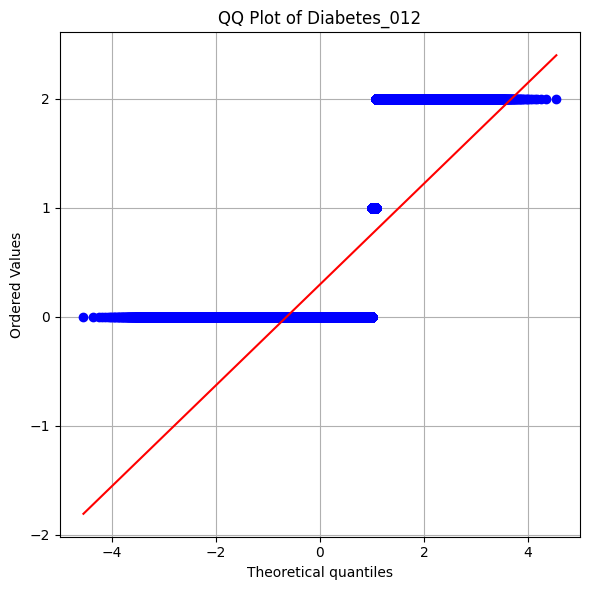

In [29]:
plt.figure(figsize=(6, 6))
stats.probplot(diabetes["Diabetes_012"], dist="norm", plot=plt)
plt.title("QQ Plot of Diabetes_012")
plt.grid(True)
plt.tight_layout()
plt.show()

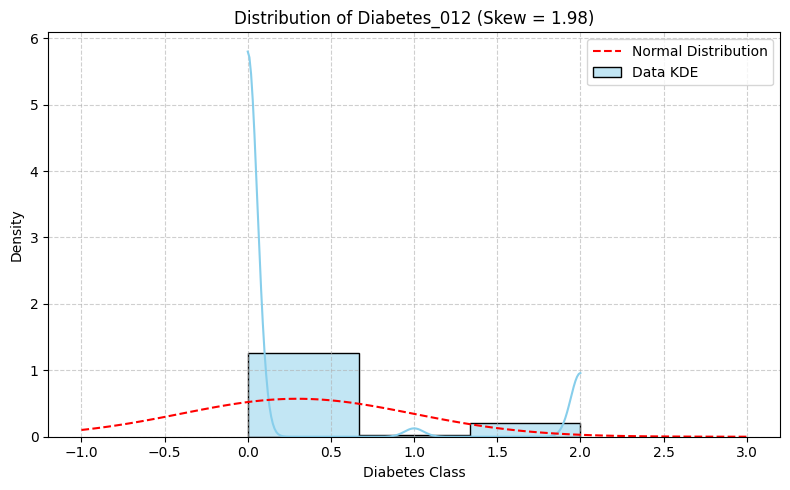

In [ ]:
data = diabetes["Diabetes_012"]

plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, stat="density", bins=3, color="skyblue", edgecolor="black", label="Data KDE")

# Overlay normal distribution with same mean & std
mu, std = data.mean(), data.std()
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin - 1, xmax + 1, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r--', label="Normal Distribution")

plt.title(f"Distribution of Diabetes_012 (Skew = {data.skew():.2f})")
plt.xlabel("Diabetes Class")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


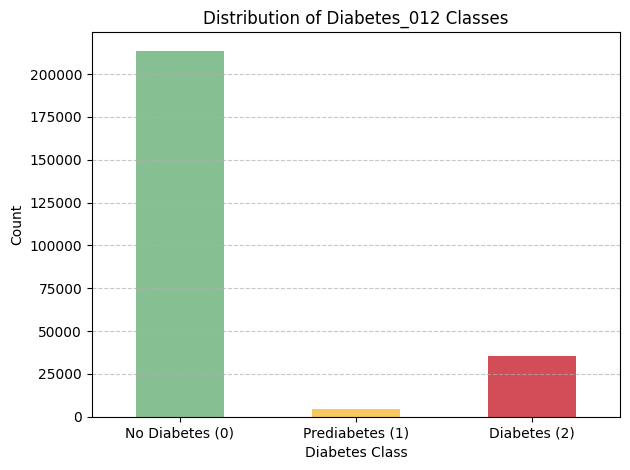

In [32]:
counts.plot(kind='bar', color=["#86bf91", "#f6c85f", "#d24d57"])
plt.title("Distribution of Diabetes_012 Classes")
plt.xlabel("Diabetes Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
counts = diabetes["Diabetes_012"].value_counts().sort_index()
percentages = diabetes["Diabetes_012"].value_counts(normalize=True).sort_index() * 100
summary = pd.DataFrame({
    "Count": counts,
    "Percentage": percentages.round(2)
})
print(summary)


               Count  Percentage
Diabetes_012                    
0.0           213703       84.24
1.0             4631        1.83
2.0            35346       13.93


In [35]:
summary

,Count,Percentage
Diabetes_012,,
0.0,213703,84.24
1.0,4631,1.83
2.0,35346,13.93


In [36]:
diabetes["Diabetes_012"].dtype

dtype('float64')

In [44]:
if "BMI" in diabetes.columns:
    print(diabetes.groupby("Diabetes_012")["BMI"].mean())


Diabetes_012
0.0    27.742521
1.0    30.724466
2.0    31.944011
Name: BMI, dtype: float64


In [45]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [46]:
diabetes["HighBP"].head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: HighBP, dtype: float64

In [47]:
diabetes["HighBP"].value_counts()

HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64

In [50]:
diabetes["HighBP"].describe()

count    253680.000000
mean          0.429001
std           0.494934
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighBP, dtype: float64

In [52]:
diabetes["HighBP"].isnull().sum()

np.int64(0)

In [53]:
diabetes["HighBP"].unique()

array([1., 0.])

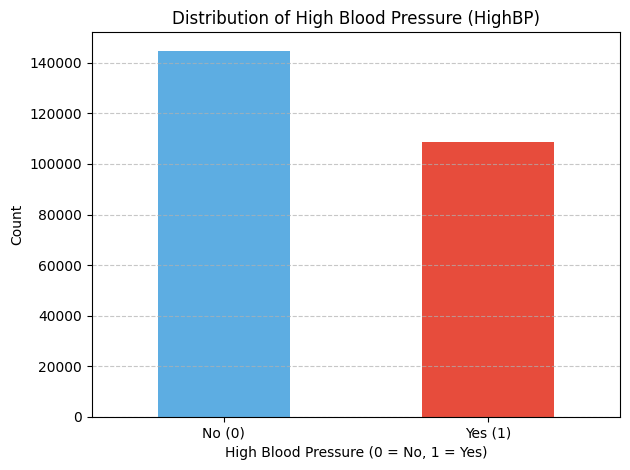

In [55]:
counts = diabetes["HighBP"].value_counts().sort_index()
counts.plot(kind='bar', color=["#5DADE2", "#E74C3C"])
plt.title("Distribution of High Blood Pressure (HighBP)")
plt.xlabel("High Blood Pressure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No (0)", "Yes (1)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


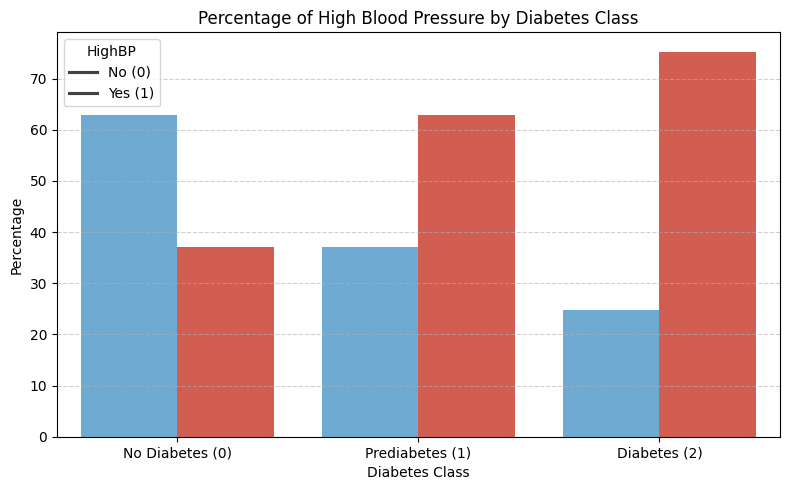

In [57]:
percent_df = pd.crosstab(diabetes["Diabetes_012"], diabetes["HighBP"], normalize='index') * 100
percent_df = percent_df.reset_index().melt(id_vars="Diabetes_012", var_name="HighBP", value_name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(data=percent_df, x="Diabetes_012", y="Percentage", hue="HighBP", palette=["#5DADE2", "#E74C3C"])

plt.title("Percentage of High Blood Pressure by Diabetes Class")
plt.xlabel("Diabetes Class")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1, 2], labels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"])
plt.legend(title="HighBP", labels=["No (0)", "Yes (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
